# New York City Hate Crime Analysis

## About the Dataset


#### The NYPD Hate Crime Dataset is a publicly available dataset maintained by the New York Police Department, accessible through platforms like the U.S. Government's Open Data portal (https://data.gov/). This dataset provides detailed information on hate crime incidents reported across New York City, including crime types, locations, dates, and motivations.

#### A key feature of the dataset is its categorization of crimes based on motivations such as race, religion, sexual orientation, gender identity, and disability. This classification helps identify targeted groups, track trends in hate crimes over time, and provide valuable insights for policymakers, law enforcement, and advocacy groups working toward safer communities.

### Data Preprocessing

In [1]:
#import libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df= pd.read_csv('NYPD_Hate_Crimes.csv')

In [3]:
#top 5 rows
df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,2.021050e+14,2021,5,5/1/2021,50,PATROL BORO BRONX,BRONX,FELONY,BURGLARY,"BURGLARY,UNCLASSIFIED,NIGHT",ANTI-JEWISH,Religion/Religious Practice,5/1/2021,B33683676
1,2.021050e+14,2021,12,12/28/2021,50,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,9/28/2022,B34705870
2,2.022050e+14,2022,10,10/11/2022,49,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,10/11/2022,B34707656
3,2.019060e+14,2019,1,1/15/2019,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MURDER & NON-NEGL. MANSLAUGHTE,"MURDER,UNCLASSIFIED",ANTI-ASIAN,Race/Color,1/16/2019,K31675023
4,2.019070e+14,2019,2,2/8/2019,71,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-JEWISH,Religion/Religious Practice,2/8/2019,K31679592


In [4]:
#bottom 5 rows
df.tail()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
3250,2.024070e+14,2024,5,6/6/2024,66,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3251,2.024070e+14,2024,3,3/19/2024,68,PATROL BORO BKLYN SOUTH,KINGS,FELONY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MIS 2 & 3,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3252,2.024080e+14,2024,7,7/30/2024,84,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN
3253,2.024100e+14,2024,5,5/10/2024,104,PATROL BORO QUEENS NORTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-MUSLIM,Religion/Religious Practice,NaN,NaN
3254,2.024110e+14,2024,7,7/21/2024,107,PATROL BORO QUEENS SOUTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


In [5]:
#data Info
df.shape

(3255, 14)

In [6]:
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

In [7]:
df.dtypes

Full Complaint ID                float64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                       object
Arrest Id                         object
dtype: object

In [8]:
#Checking for data consistency
df.isnull().sum()

Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1849
Arrest Id                        1849
dtype: int64

### Data Transformation and Cleaning

In [9]:
#checking and removing duplicate rows
df.duplicated().sum()

36

In [10]:
df.drop_duplicates()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,2.021050e+14,2021,5,5/1/2021,50,PATROL BORO BRONX,BRONX,FELONY,BURGLARY,"BURGLARY,UNCLASSIFIED,NIGHT",ANTI-JEWISH,Religion/Religious Practice,5/1/2021,B33683676
1,2.021050e+14,2021,12,12/28/2021,50,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,9/28/2022,B34705870
2,2.022050e+14,2022,10,10/11/2022,49,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,10/11/2022,B34707656
3,2.019060e+14,2019,1,1/15/2019,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MURDER & NON-NEGL. MANSLAUGHTE,"MURDER,UNCLASSIFIED",ANTI-ASIAN,Race/Color,1/16/2019,K31675023
4,2.019070e+14,2019,2,2/8/2019,71,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-JEWISH,Religion/Religious Practice,2/8/2019,K31679592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2.024070e+14,2024,5,6/6/2024,66,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3251,2.024070e+14,2024,3,3/19/2024,68,PATROL BORO BKLYN SOUTH,KINGS,FELONY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MIS 2 & 3,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3252,2.024080e+14,2024,7,7/30/2024,84,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN
3253,2.024100e+14,2024,5,5/10/2024,104,PATROL BORO QUEENS NORTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-MUSLIM,Religion/Religious Practice,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              3255 non-null   float64
 1   Complaint Year Number          3255 non-null   int64  
 2   Month Number                   3255 non-null   int64  
 3   Record Create Date             3255 non-null   object 
 4   Complaint Precinct Code        3255 non-null   int64  
 5   Patrol Borough Name            3255 non-null   object 
 6   County                         3255 non-null   object 
 7   Law Code Category Description  3255 non-null   object 
 8   Offense Description            3255 non-null   object 
 9   PD Code Description            3255 non-null   object 
 10  Bias Motive Description        3255 non-null   object 
 11  Offense Category               3255 non-null   object 
 12  Arrest Date                    1406 non-null   o

In [12]:
#removing unnecessary columns from dataset
df= df.drop(['Full Complaint ID','Arrest Date','Arrest Id','Offense Description','PD Code Description'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Complaint Year Number          3255 non-null   int64 
 1   Month Number                   3255 non-null   int64 
 2   Record Create Date             3255 non-null   object
 3   Complaint Precinct Code        3255 non-null   int64 
 4   Patrol Borough Name            3255 non-null   object
 5   County                         3255 non-null   object
 6   Law Code Category Description  3255 non-null   object
 7   Bias Motive Description        3255 non-null   object
 8   Offense Category               3255 non-null   object
dtypes: int64(3), object(6)
memory usage: 229.0+ KB


In [14]:
#renaming columns
df.columns= df.columns.str.lower()

In [15]:
df.columns=df.columns.str.replace(' ', '_')
df.columns

Index(['complaint_year_number', 'month_number', 'record_create_date',
       'complaint_precinct_code', 'patrol_borough_name', 'county',
       'law_code_category_description', 'bias_motive_description',
       'offense_category'],
      dtype='object')

In [16]:
#Changing datatype of record_create_date columns to Datetime
df['record_create_date']= pd.to_datetime(df['record_create_date'])

#extracting day of week from record_create_date
df['day_of_week']= df['record_create_date'].dt.weekday

#Converting Month Number to Month Name
month_map= {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug',
           9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month']= df['month_number'].map(month_map)

#Chaning int type of complaint_precinct_code column to str type
df['complaint_precinct_code']= df['complaint_precinct_code'].astype(str)

In [17]:
df.head()

,complaint_year_number,month_number,record_create_date,complaint_precinct_code,patrol_borough_name,county,law_code_category_description,bias_motive_description,offense_category,day_of_week,month
0,2021,5,2021-05-01,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,5,May
1,2021,12,2021-12-28,50,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,1,Dec
2,2022,10,2022-10-11,49,PATROL BORO BRONX,BRONX,FELONY,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,1,Oct
3,2019,1,2019-01-15,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-ASIAN,Race/Color,1,Jan
4,2019,2,2019-02-08,71,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,4,Feb


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   complaint_year_number          3255 non-null   int64         
 1   month_number                   3255 non-null   int64         
 2   record_create_date             3255 non-null   datetime64[ns]
 3   complaint_precinct_code        3255 non-null   object        
 4   patrol_borough_name            3255 non-null   object        
 5   county                         3255 non-null   object        
 6   law_code_category_description  3255 non-null   object        
 7   bias_motive_description        3255 non-null   object        
 8   offense_category               3255 non-null   object        
 9   day_of_week                    3255 non-null   int64         
 10  month                          3255 non-null   object        
dtypes: datetime64[ns]

### Total Crimes Reported by Patrol Boroughs 

In [19]:
patrol_count= df['patrol_borough_name'].value_counts()
patrol_count

PATROL BORO MAN SOUTH        749
PATROL BORO BKLYN SOUTH      639
PATROL BORO BKLYN NORTH      491
PATROL BORO MAN NORTH        471
PATROL BORO QUEENS NORTH     371
PATROL BORO QUEENS SOUTH     212
PATROL BORO BRONX            200
PATROL BORO STATEN ISLAND    122
Name: patrol_borough_name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


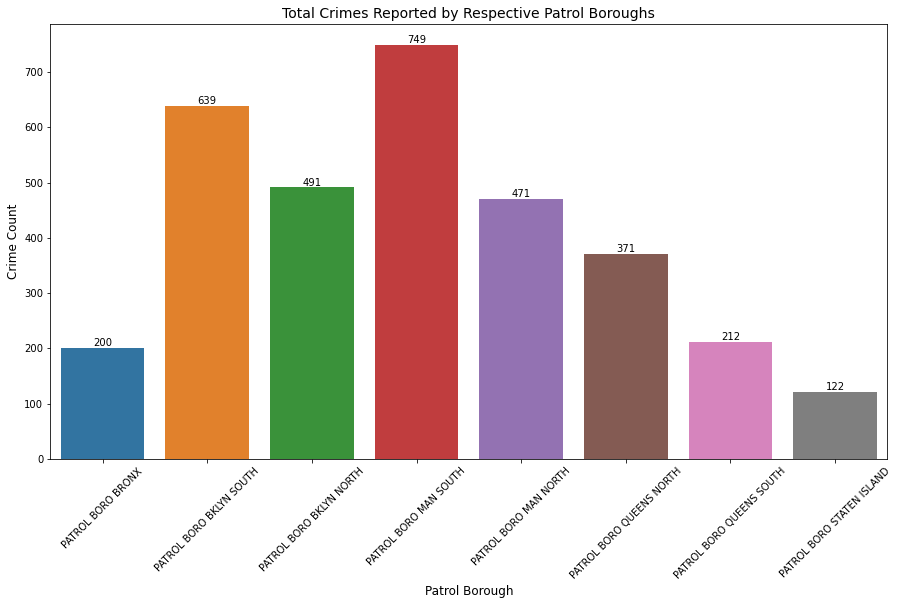

In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
x=sns.countplot(df['patrol_borough_name'])
plt.title('Total Crimes Reported by Respective Patrol Boroughs',fontsize=14)
plt.ylabel('Crime Count',fontsize=12)
plt.xlabel('Patrol Borough',fontsize=12)

#for showing values on bars
x.bar_label(x.containers[0])

plt.show()

observation: Highest crimes are registered in PATROL BORO MAN SOUTH(749) and least crimes in PATROL BORO STATEN ISLAND(122)

### Total Crimes Reported by Patrol Boroughs in Percentage

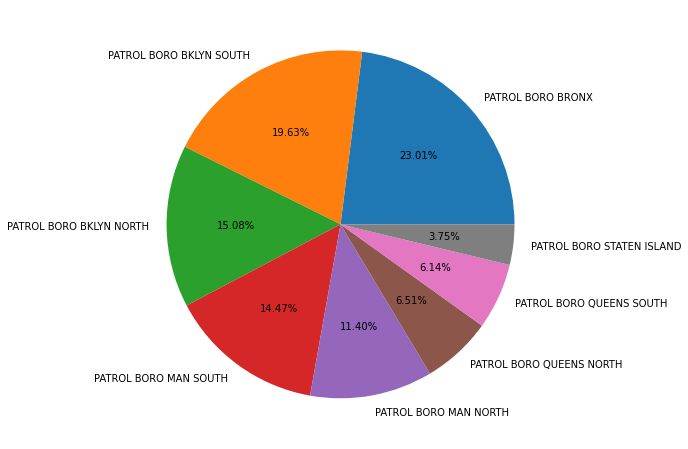

In [21]:
#Using Pie Chart
plt.figure(figsize=(8,8)) 
plt.pie(df['patrol_borough_name'].value_counts(), labels= df['patrol_borough_name'].unique(), autopct='%1.2f%%')
plt.show()

### Top 10 Bias Motivations in Hate Crimes

In [22]:
df.columns

Index(['complaint_year_number', 'month_number', 'record_create_date',
       'complaint_precinct_code', 'patrol_borough_name', 'county',
       'law_code_category_description', 'bias_motive_description',
       'offense_category', 'day_of_week', 'month'],
      dtype='object')

In [23]:
top_10_motives=df['bias_motive_description'].value_counts().head(10)
top_10_motives

ANTI-JEWISH                   1504
ANTI-MALE HOMOSEXUAL (GAY)     420
ANTI-ASIAN                     355
ANTI-BLACK                     257
ANTI-OTHER ETHNICITY           133
ANTI-MUSLIM                    121
ANTI-WHITE                     110
ANTI-TRANSGENDER                84
ANTI-HISPANIC                   77
ANTI-CATHOLIC                   57
Name: bias_motive_description, dtype: int64

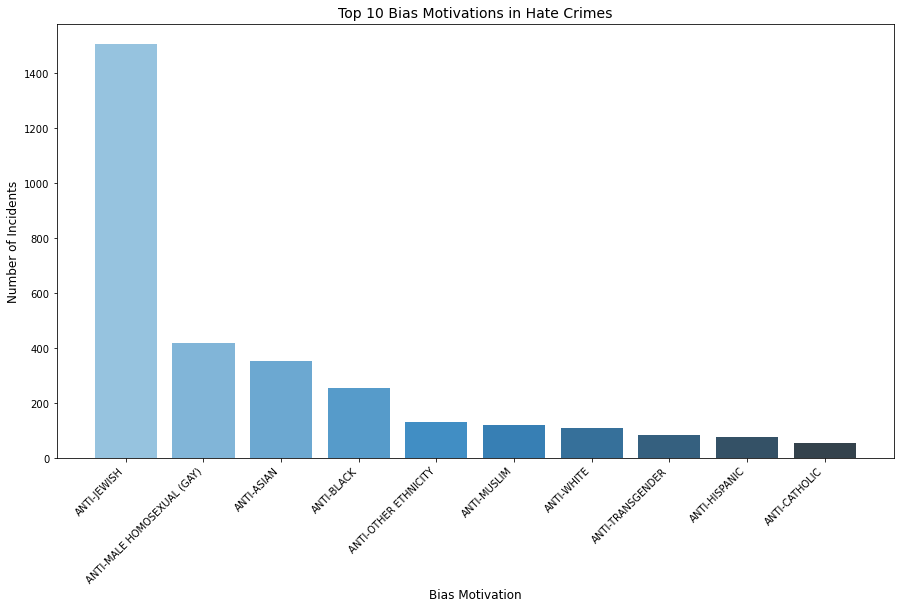

In [24]:
plt.figure(figsize=(15,8))
colors = sns.color_palette("Blues_d", len(top_10_motives))
plt.bar(top_10_motives.index, top_10_motives.values, color=colors)
plt.title('Top 10 Bias Motivations in Hate Crimes', fontsize=14)
plt.xlabel('Bias Motivation', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

observation: ANTI-JEWISH is the main reason for Bias Motivations in Hate Crimes(1504)

### Distribution of Crimes by Offense Category

In [25]:
offense_count = df['offense_category'].value_counts()
offense_count

Religion/Religious Practice           1718
Race/Color                             724
Sexual Orientation                     466
Ethnicity/National Origin/Ancestry     218
Gender                                 119
Unclassified                             8
Disability                               1
Age                                      1
Name: offense_category, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


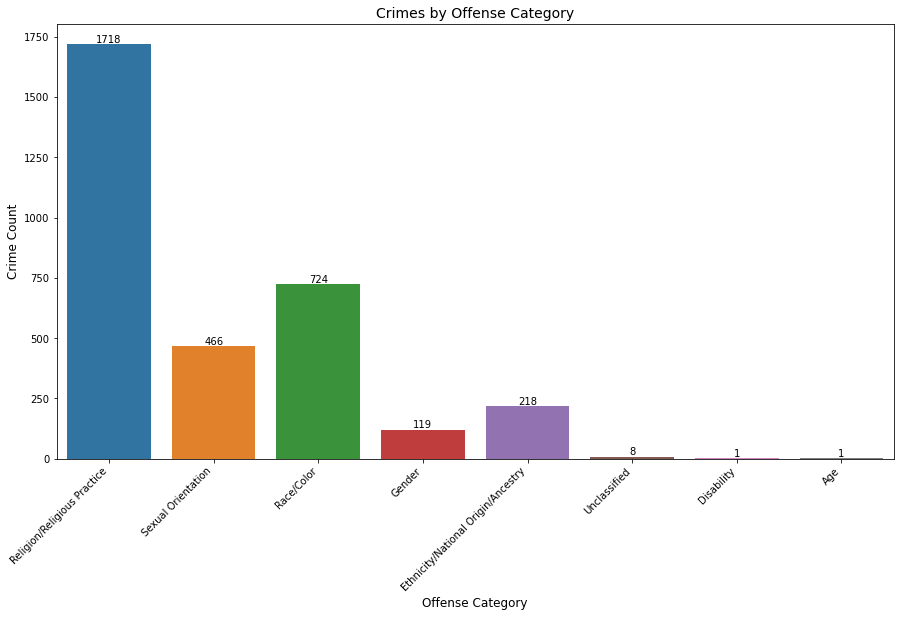

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45, ha='right')
x=sns.countplot(df['offense_category'])
plt.title('Crimes by Offense Category',fontsize=14)
plt.ylabel('Crime Count',fontsize=12)
plt.xlabel('Offense Category',fontsize=12)

#for showing values on bars
x.bar_label(x.containers[0])

plt.show()

observation: Religion/Religious Practice in Offense Category registered more number of crimes(1718) 

### Distribution of Crimes by County

In [27]:
df['county'].value_counts()

NEW YORK    1220
KINGS       1130
QUEENS       583
BRONX        200
RICHMOND     122
Name: county, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


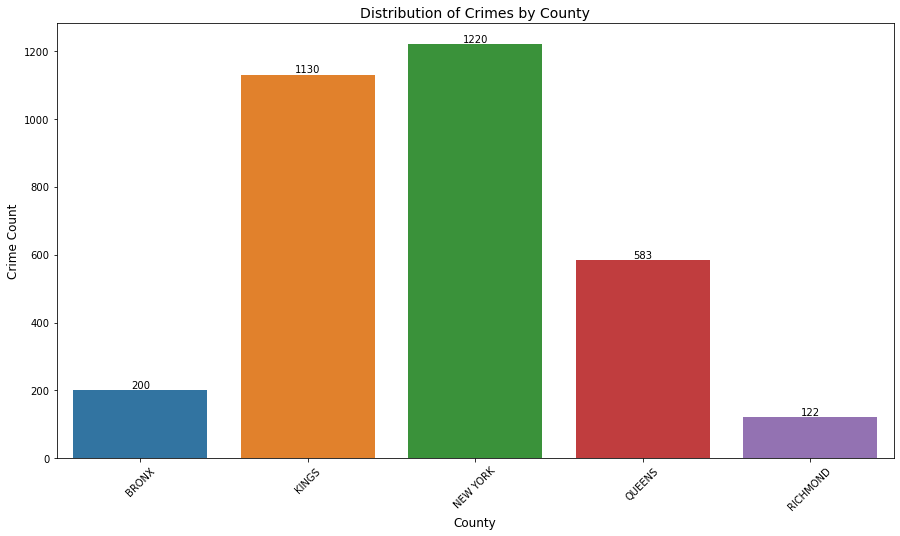

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
x=sns.countplot(df['county'])
plt.title('Distribution of Crimes by County',fontsize=14)
plt.ylabel('Crime Count',fontsize=12)
plt.xlabel('County',fontsize=12)

#for showing values on bars
x.bar_label(x.containers[0])

plt.show()

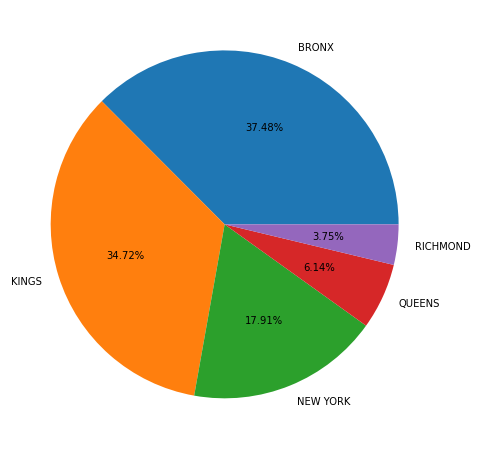

In [29]:
#Using Pie Chart
plt.figure(figsize=(8,8)) 
plt.pie(df['county'].value_counts(), labels= df['county'].unique(), autopct='%1.2f%%')
plt.show()

observation: New York has more number of Hate Crimes registered.

### Distribution of Crimes by Category

In [30]:
df.columns

Index(['complaint_year_number', 'month_number', 'record_create_date',
       'complaint_precinct_code', 'patrol_borough_name', 'county',
       'law_code_category_description', 'bias_motive_description',
       'offense_category', 'day_of_week', 'month'],
      dtype='object')

In [31]:
df['law_code_category_description'].value_counts()

FELONY           1618
MISDEMEANOR      1612
VIOLATION          23
INVESTIGATION       2
Name: law_code_category_description, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


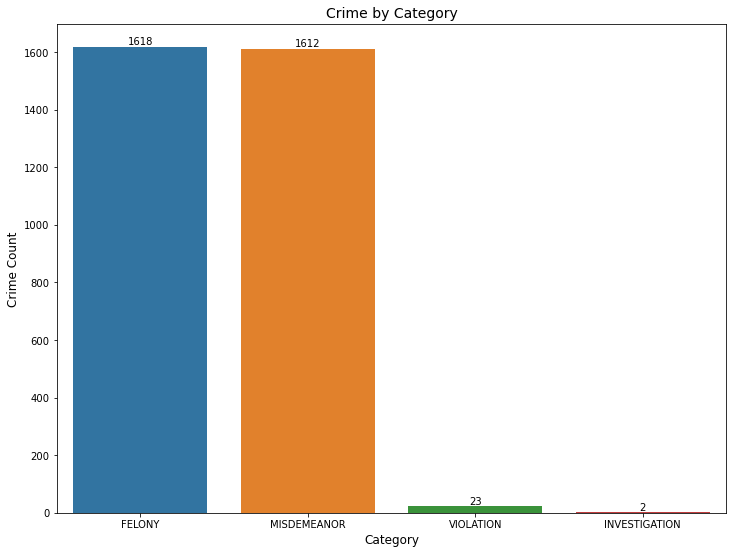

In [36]:
plt.figure(figsize=(12,9))
x= sns.countplot(df['law_code_category_description'])
plt.title('Crime by Category',fontsize=14)
plt.ylabel('Crime Count',fontsize=12)
plt.xlabel('Category',fontsize=12)
x.bar_label(x.containers[0])
plt.show()

### Yearly Crime Trend

In [41]:
year_count=df['complaint_year_number'].value_counts().sort_index()
year_count

2019    447
2020    284
2021    578
2022    672
2023    755
2024    519
Name: complaint_year_number, dtype: int64

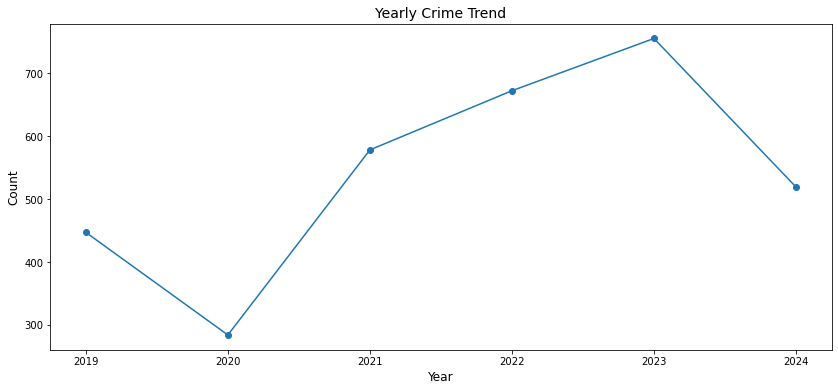

In [47]:
plt.figure(figsize=(14, 6))
plt.plot(year_count.index, year_count.values, marker='o', linestyle='-')
plt.title('Yearly Crime Trend',fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.show()

###  Monthly Crime Trend

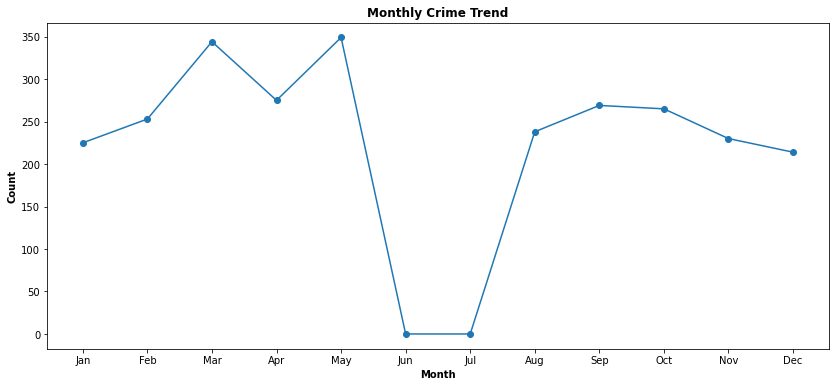

In [51]:
# sorting month in correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'],categories=month_order,ordered=True)

counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.plot(counts.index,counts.values,marker='o',linestyle='-')

plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

#  plotting
plt.show()

### Monthly Crime Trend by Year

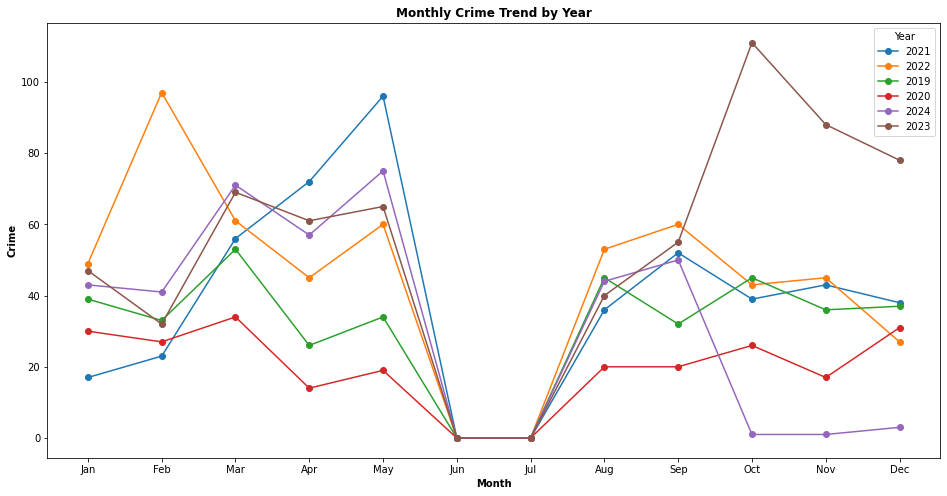

In [52]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# converting 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)

# counting the occurrences of each month
counts = df['month'].value_counts().sort_index()

# extracting unique years from the 'year' column
unique_years = df['complaint_year_number'].unique()

# plotting separate line plots for each year
plt.figure(figsize=(16, 8))
for year in unique_years:
    # data for the current year
    year_data = df[df['complaint_year_number'] == year]
    
    # counting the occurrences of each month for the current year
    year_month_counts = year_data['month'].value_counts().sort_index()
    
    # plotting the line plot for the current year
    plt.plot(year_month_counts.index, year_month_counts.values, marker='o', linestyle='-', label=str(year))

# title and axis labels
plt.title('Monthly Crime Trend by Year', fontweight='bold')
plt.ylabel('Crime', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

# adding legend
plt.legend(title='Year')

# showing the plot
plt.show()

## Project Summary

### Introduction

Hate crimes are a significant concern in urban areas, particularly in a diverse city like New York. This project aims to analyze hate crime trends in NYC using data from the NYPD. The goal is to identify patterns, understand bias motivations, and provide actionable insights for law enforcement and policymakers.

### Data Source & Collection

The analysis is based on the NYPD Hate Crime dataset, which includes:

<ul>
  <li>Reported hate crime incidents over multiple years.</li>
  <li>Categories of bias motivation (race, religion, gender, etc.).</li>
  <li>Locations (boroughs, precincts) and timestamps of reported crimes.</li>
</ul>

### Data Cleaning & Preparation

Before analysis, the data underwent preprocessing, including:
    
<ul>
  <li>Handling missing or inconsistent values.</li>
  <li>Standardizing bias motivation categories.</li>
  <li>Aggregating data for monthly and yearly trends.</li>
</ul>

### Exploratory Data Analysis (EDA)

Key aspects of EDA included:
<ul>
  <li><b>Overall Trend Analysis</b>: Examining changes in hate crimes over the years.</li>
  <li><b>Monthly and Yearly Trends</b>: Identifying seasonal variations and yearly spikes.</li>
  <li><b>Bias Motivation Breakdown</b>: Categorizing incidents by race, religion, gender, and other factors.</li>
  <li><b>Geospatial Analysis</b>: Mapping crime distribution across NYC boroughs.</li>
</ul>

### Key Insights & Findings

<ul>
  <li>Hate crimes showed increasing trends in specific years, possibly linked to political and social events.</li>
  <li>Seasonal variations indicate spikes during specific months, potentially linked to societal tensions.</li>
  <li>Certain boroughs and neighborhoods experience higher rates of hate crimes than others.</li>
  <li>Specific communities are disproportionately affected by race- and religion-based bias crimes.</li>
</ul>

### Policy Recommendations & Actionable Insights 

Based on the analysis, the following recommendations are suggested:
<ul>
  <li>Increased law enforcement presence in high-risk areas.</li>
  <li>Community outreach programs to foster awareness and prevention.</li>
  <li>Stronger reporting mechanisms to encourage victims to report incidents.</li>
  <li>Targeted policy interventions to address specific bias motivations.</li>
</ul> 

### Conclusion

The analysis provides a comprehensive view of NYPD hate crime trends. Understanding these patterns helps in crafting policies and community interventions to reduce hate crimes and promote public safety. Continued monitoring and collaboration with stakeholders are essential for long-term improvement.

This project serves as a valuable tool for understanding and mitigating hate crimes in NYC. Future extensions may include real-time analysis and integration with social media sentiment data for proactive intervention.